In [1]:
import pytorch3d

ModuleNotFoundError: No module named 'pytorch3d'

In [2]:
from reconstruction_with_dl.end_to_end_architecture_volume import train

/home/eloy/anaconda3/envs/pytorch3d/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.float32


In [7]:
from classes_with_parameters import ParametersLearningSetup, ParametersDataGeneration
from manage_files.read_save_files import read_image, read_images_in_folder
from reconstruction_with_dl.data_set_views import ViewsRandomlyOriented
from manage_files.read_save_files import write_array_csv
from manage_files.paths import PATH_REAL_DATA
from common_image_processing_methods.others import *
import numpy as np
from common_image_processing_methods.rotation_translation import get_rot_vec_from_rot_mat, get_3d_rotation_matrix
from reconstruction_with_dl.data_set_views import ViewsRandomlyOrientedSimData

In [4]:
import torch
torch.cuda.empty_cache()

In [5]:
pth_psf = ""
multichannel = True
nb_channels = 2 if multichannel else 1
sig_z = 3
sym_loss = True
for test in range(5):
    #pth_real_data = f"{PATH_REAL_DATA}/Assembly_cropped_normalized"
    pth_real_data = f'{PATH_REAL_DATA}/SAS6/picking/deconv_cropped_proto/all_views'
    save_fold = (f"{PATH_REAL_DATA}/SAS6/results_all_views/test_{test}")
    #psf = read_image(pth_psf)
    #save_fold = f"{PATH_REAL_DATA}/results_assembly/week_18_mars/test_{test}"
    if sym_loss:
        save_fold += "_sym_loss"
    views, fns = read_images_in_folder(pth_real_data, alphabetic_order=False, multichannel=multichannel)
    #views_channel_1 = np.array([views[v, 0, :,:,:] for v in range(len(views))])
    nb_views = len(views)
    if not multichannel:
        views = np.expand_dims(views, axis=1)
    size = views[0].shape[1]
    nb_epochs = 2000
    x = 400
    nb_dim = 3
    start_ep_learn_het = 0
    nb_dim_het = 1
    data_set = ViewsRandomlyOriented(views, size, nb_dim, fns)
    nb_epochs_each_phases_ACE_Het = None
    params_learnng_setup = ParametersLearningSetup(heterogeneity=True, use_sym_loss=sym_loss,
                                                      rot_representation='6d', encoder_name='holly', nb_epochs=nb_epochs, bs=1, device=0,
                                                      init='random', batch_norm_rot=False, batch_norm_trans=False,
                                                      coeff_trans=0.01, coeff_reg_trans_ratio=1, init_gain=1, use_sdf=False, nb_dim_het=nb_dim_het,
                                                                vae_param=0, freeze_encoder=None, loss_type='l2',
                                                   start_ep_learn_het = start_ep_learn_het, use_reg_trans=False, init_coeff_reg_trans=5*10**-4,
                                                   nb_channels=nb_channels, nb_epochs_each_phases_ACE_Het=nb_epochs_each_phases_ACE_Het)

    params_data_gen = ParametersDataGeneration(size=size, psf=None, sig_z=sig_z, sig_xy=1)
    train(data_set, save_fold, params_data_gen, params_learnng_setup, init_vol=None, x=x, known_rot=False, known_trans=False, impose_cylinder=False)


/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_all_views/test_0_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))
/home/eloy/Documents/stage_reconstruction_spfluo/code/reconstruction_with_dl/pose_net.py:78: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(l.weight, gain=params.init_gain)
/home/eloy/anaconda3/envs/pytorch3d/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


psf fourier type torch.complex64
Number of NaN values psf 0
Step 0, mean loss [0.9995285]
trans abs val 0.10949015786701982
Step 1, mean loss [0.49506435]
trans abs val 0.11438422058978356
Step 2, mean loss [0.36818457]
trans abs val 0.11238095780049474
Step 3, mean loss [0.29323873]
trans abs val 0.11906945471428643
Step 4, mean loss [0.24726824]
trans abs val 0.11521962703752124
Step 5, mean loss [0.22902219]
trans abs val 0.12085854834761502
Step 6, mean loss [0.2033544]
trans abs val 0.1197980922485186
Step 7, mean loss [0.20792814]
trans abs val 0.11669029332389516
Step 8, mean loss [0.17153324]
trans abs val 0.11702717822199026
Step 9, mean loss [0.16762537]
trans abs val 0.11914394389499318
Step 10, mean loss [0.16881166]
trans abs val 0.11710990725223683
Step 11, mean loss [0.13400179]
trans abs val 0.11503672587477472
Step 12, mean loss [0.15262012]
trans abs val 0.11901449018027171
Step 13, mean loss [0.13811713]
trans abs val 0.12202413724966285
Step 14, mean loss [0.1283688

/home/eloy/Documents/stage_reconstruction_spfluo/code/reconstruction_with_dl/end_to_end_architecture_volume.py:346: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  true_heterogeneities = np.array(true_heterogeneities)
/home/eloy/Documents/stage_reconstruction_spfluo/code/reconstruction_with_dl/end_to_end_architecture_volume.py:346: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the n

directory /home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_all_views/test_0_sym_loss/ep_399/vols created
shp (121, 1, 2, 60, 60, 60)
shp (121, 1, 2, 60, 60, 60)
Step 400, mean loss [0.031487]
trans abs val 0.115160464563153
Step 401, mean loss [0.03121691]
trans abs val 0.11322693619107412
Step 402, mean loss [0.03204186]
trans abs val 0.11339042668253922
Step 403, mean loss [0.03187322]
trans abs val 0.11463800171190057
Step 404, mean loss [0.03099334]
trans abs val 0.11382344198867309
Step 405, mean loss [0.03250533]
trans abs val 0.11414419243897288
Step 406, mean loss [0.03323489]
trans abs val 0.11266158059362538
Step 407, mean loss [0.04413248]
trans abs val 0.11133280285626404
Step 408, mean loss [0.03688066]
trans abs val 0.11375111710926718
Step 409, mean loss [0.03348477]
trans abs val 0.11300094431835758
Step 410, mean loss [0.03457695]
trans abs val 0.11374664189648037
Step 411, mean loss [0.03460865]
trans abs val 0.11136413833572845
Step 412, mean l

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_all_views/test_1_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [2.9494941]
trans abs val 0.04167935182917709
Step 1, mean loss [0.6086428]
trans abs val 0.051689496648705695
Step 2, mean loss [0.4310232]
trans abs val 0.04659529935476209
Step 3, mean loss [0.3251879]
trans abs val 0.049270443110303444
Step 4, mean loss [0.26035988]
trans abs val 0.059942241634958045
Step 5, mean loss [0.17330995]
trans abs val 0.06058631024577401
Step 6, mean loss [0.14531454]
trans abs val 0.06097036523144107
Step 7, mean loss [0.13734698]
trans abs val 0.06317422548232
Step 8, mean loss [0.12034091]
trans abs val 0.06262179313242928
Step 9, mean loss [0.11747725]
trans abs val 0.05843329660532888
Step 10, mean loss [0.11115374]
trans abs val 0.05986064084428401
Step 11, mean loss [0.11820566]
trans abs val 0.0612136568597033
Step 12, mean loss [0.10088016]
trans abs val 0.062157854253102926
Step 13, mean loss [0.0884051]
trans abs val 0.061481117370946345
Step 14, mean loss [0.09017753]
trans abs val 0.06099311170006586
Step 15, mean loss [0.08

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_all_views/test_2_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [1.2132524]
trans abs val 0.079746534709226
Step 1, mean loss [0.5823539]
trans abs val 0.11447019283929147
Step 2, mean loss [0.36795333]
trans abs val 0.11402929857496388
Step 3, mean loss [0.2533811]
trans abs val 0.11909322157379024
Step 4, mean loss [0.18628125]
trans abs val 0.11510902507738634
Step 5, mean loss [0.16518953]
trans abs val 0.1187497878000756
Step 6, mean loss [0.14999549]
trans abs val 0.11686648773260352
Step 7, mean loss [0.14409374]
trans abs val 0.11687757739843416
Step 8, mean loss [0.12476821]
trans abs val 0.118797405076421
Step 9, mean loss [0.11487459]
trans abs val 0.118787146920015
Step 10, mean loss [0.11167131]
trans abs val 0.11867199136205941
Step 11, mean loss [0.11095377]
trans abs val 0.11991374225409562
Step 12, mean loss [0.1043699]
trans abs val 0.1221103168223515
Step 13, mean loss [0.10144671]
trans abs val 0.12007721833699991
Step 14, mean loss [0.10713094]
trans abs val 0.12313761149556184
Step 15, mean loss [0.10106041]


/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_all_views/test_3_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [1.3810824]
trans abs val 0.03563752136200913
Step 1, mean loss [0.599662]
trans abs val 0.08320679571017746
Step 2, mean loss [0.46107918]
trans abs val 0.09577990791275481
Step 3, mean loss [0.38136587]
trans abs val 0.08509856862716439
Step 4, mean loss [0.27726808]
trans abs val 0.08289769593595474
Step 5, mean loss [0.24080041]
trans abs val 0.08475145291198384
Step 6, mean loss [0.23069647]
trans abs val 0.07563382470287568
Step 7, mean loss [0.16954114]
trans abs val 0.07686133128552397
Step 8, mean loss [0.15311772]
trans abs val 0.07601937993375724
Step 9, mean loss [0.13275908]
trans abs val 0.0724648686418356
Step 10, mean loss [0.13378102]
trans abs val 0.07910800922261782
Step 11, mean loss [0.11633531]
trans abs val 0.08028956872126287
Step 12, mean loss [0.12326731]
trans abs val 0.0832015764245317
Step 13, mean loss [0.10659895]
trans abs val 0.0810235401323019
Step 14, mean loss [0.10334172]
trans abs val 0.08247038875975884
Step 15, mean loss [0.0940

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_all_views/test_4_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [1.4835799]
trans abs val 0.06941830250242155
Step 1, mean loss [0.6308252]
trans abs val 0.221857665245198
Step 2, mean loss [0.37014276]
trans abs val 0.11088512382231468
Step 3, mean loss [0.24768686]
trans abs val 0.09083921443824926
Step 4, mean loss [0.20874582]
trans abs val 0.08229642235173666
Step 5, mean loss [0.15465568]
trans abs val 0.08499747249952033
Step 6, mean loss [0.14233047]
trans abs val 0.09212150941949246
Step 7, mean loss [0.14008164]
trans abs val 0.09038862469028836
Step 8, mean loss [0.11927366]
trans abs val 0.09543969069630646
Step 9, mean loss [0.11567493]
trans abs val 0.09588393187227327
Step 10, mean loss [0.12196533]
trans abs val 0.09369379029539991
Step 11, mean loss [0.11381155]
trans abs val 0.0959581246922824
Step 12, mean loss [0.10906833]
trans abs val 0.09993919884124078
Step 13, mean loss [0.10547493]
trans abs val 0.09578256783160297
Step 14, mean loss [0.10124049]
trans abs val 0.09679600017622483
Step 15, mean loss [0.099

In [6]:
pth_psf = ""
multichannel = False
nb_channels = 2 if multichannel else 1
sig_z = 3

In [9]:
#pth_real_data = f'{PATH_REAL_DATA}/SAS6/picking/deconv_cropped_proto/side_views'
pth_real_data = f"{PATH_REAL_DATA}/Assembly_cropped_normalized"
#psf = read_image(pth_psf)
views, fns = read_images_in_folder(pth_real_data, alphabetic_order=False, multichannel=multichannel)
nb_views = len(views)
if not multichannel:
    views = np.expand_dims(views, axis=1)
size = views[0].shape[1]
nb_epochs = 2000
x = 400
nb_dim = 3
start_ep_learn_het = 0
nb_dim_het = 1
data_set = ViewsRandomlyOriented(views, size, nb_dim, fns)
sym_loss = True
nb_epochs_each_phases_ACE_Het = None

NameError: name 'multichannel' is not defined

In [8]:
#comb_to_test = [[20,20], [1,1], [2,2], [20, 3], [200, 20], [200,200], [200,50], [20,100], [100,100]]
import torch
torch.cuda.empty_cache()

In [9]:
all_est_het = []
all_est_rot = []
all_est_transs = []
all_fns = []
all_est_vols = []
all_views = []
all_nets = []

for i in range(15):
    # save_fold = f"{PATH_REAL_DATA}/SAS6/results_side_views/test_multi_dim_het_2_{i}"
    save_fold = f"{PATH_REAL_DATA}/results_assembly/week_18_mars/test_{i}"
    if sym_loss:
        save_fold += "_sym_loss"
    params_learnng_setup = ParametersLearningSetup(heterogeneity=True, use_sym_loss=sym_loss,
                                                                  rot_representation='6d', encoder_name='holly', nb_epochs=nb_epochs, bs=1, device=0,
                                                                  init='random', batch_norm_rot=False, batch_norm_trans=False,
                                                                  coeff_trans=0.01, coeff_reg_trans_ratio=1, init_gain=1, use_sdf=False, nb_dim_het=nb_dim_het,
                                                                            vae_param=0, freeze_encoder=None, loss_type='l2',
                                                               start_ep_learn_het = start_ep_learn_het, use_reg_trans=False, init_coeff_reg_trans=5*10**-4,
                                                               nb_channels=nb_channels, nb_epochs_each_phases_ACE_Het=nb_epochs_each_phases_ACE_Het)
    
    params_data_gen = ParametersDataGeneration(size=size, psf=None, sig_z=sig_z, sig_xy=1)
    est_heterogeneities, est_rot_mats, est_transs, file_names, est_vols, views, net = train(data_set, save_fold, params_data_gen, 
                                                                                            params_learnng_setup, init_vol=None, x=x, known_rot=False, known_trans=False, impose_cylinder=False)
    all_est_het.append(est_heterogeneities)
    all_est_rot.append(est_rot_mats)
    all_est_transs.append(est_transs)
    all_fns.append(file_names)
    all_est_vols.append(est_vols)
    all_views.append(views)
    all_nets.append(net)
   

directory /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_0_sym_loss created
directory /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_0_sym_loss/views created
psf fourier type torch.complex64
Number of NaN values psf 0


/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_0_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.70971227]
trans abs val 0.09035424843867436
Step 1, mean loss [0.300913]
trans abs val 0.13651640014148053
Step 2, mean loss [0.2333271]
trans abs val 0.12502729267249874
Step 3, mean loss [0.1542424]
trans abs val 0.061352867909051756
Step 4, mean loss [0.10235894]
trans abs val 0.06160736277147576
Step 5, mean loss [0.07959902]
trans abs val 0.06023400663225739
Step 6, mean loss [0.06145958]
trans abs val 0.06236071029195079
Step 7, mean loss [0.05305839]
trans abs val 0.06172118772879059
Step 8, mean loss [0.05375665]
trans abs val 0.06301569506342028
Step 9, mean loss [0.06230513]
trans abs val 0.06400958982146816
Step 10, mean loss [0.05406947]
trans abs val 0.06520468392121939
Step 11, mean loss [0.07445472]
trans abs val 0.06520653966768289
Step 12, mean loss [0.09176084]
trans abs val 0.06838175530234973
Step 13, mean loss [0.04300614]
trans abs val 0.06585458155583453
Step 14, mean loss [0.03757736]
trans abs val 0.0652722046699053
Step 15, mean loss [0.03

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_1_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.8777571]
trans abs val 0.026633305728067585
Step 1, mean loss [0.365904]
trans abs val 0.03607781548742895
Step 2, mean loss [0.2787411]
trans abs val 0.055670617125284524
Step 3, mean loss [0.21869497]
trans abs val 0.0631558323899905
Step 4, mean loss [0.16453515]
trans abs val 0.049387881325350866
Step 5, mean loss [0.1241074]
trans abs val 0.04700663460441577
Step 6, mean loss [0.1081683]
trans abs val 0.05337443221130489
Step 7, mean loss [0.074461]
trans abs val 0.045554952397022716
Step 8, mean loss [0.06333143]
trans abs val 0.04425552708131296
Step 9, mean loss [0.06342576]
trans abs val 0.045278464938387455
Step 10, mean loss [0.09146553]
trans abs val 0.043387345831703256
Step 11, mean loss [0.12191954]
trans abs val 0.07146219881596388
Step 12, mean loss [0.10417342]
trans abs val 0.055875355584753886
Step 13, mean loss [0.07454102]
trans abs val 0.05710609730930976
Step 14, mean loss [0.05812543]
trans abs val 0.05664786921791089
Step 15, mean loss [0.

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_2_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


psf fourier type torch.complex64
Number of NaN values psf 0
Step 0, mean loss [1.2116029]
trans abs val 0.025103501423641487
Step 1, mean loss [0.6025926]
trans abs val 0.06269448422999294
Step 2, mean loss [0.6619262]
trans abs val 0.07579675160440398
Step 3, mean loss [0.8486242]
trans abs val 0.0957490983016697
Step 4, mean loss [0.33165085]
trans abs val 0.135486855826996
Step 5, mean loss [0.20182529]
trans abs val 0.11417812679284885
Step 6, mean loss [0.16172294]
trans abs val 0.1030283326536049
Step 7, mean loss [0.21313167]
trans abs val 0.09216552724440892
Step 8, mean loss [0.137885]
trans abs val 0.11697703535542076
Step 9, mean loss [0.10323421]
trans abs val 0.12084375395451064
Step 10, mean loss [0.12180892]
trans abs val 0.11303743388917711
Step 11, mean loss [0.08812471]
trans abs val 0.10776569188377004
Step 12, mean loss [0.09323355]
trans abs val 0.10848766151401731
Step 13, mean loss [0.10668125]
trans abs val 0.10598506585315422
Step 14, mean loss [0.09688326]
tra

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_3_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.8646661]
trans abs val 0.06322024307892095
Step 1, mean loss [0.33685258]
trans abs val 0.10021909013574506
Step 2, mean loss [0.18542394]
trans abs val 0.09226432746207272
Step 3, mean loss [0.13578546]
trans abs val 0.11033937325816096
Step 4, mean loss [0.10610651]
trans abs val 0.10757822791735332
Step 5, mean loss [0.09832396]
trans abs val 0.10697824995458861
Step 6, mean loss [0.08640536]
trans abs val 0.10373592652656415
Step 7, mean loss [0.07803362]
trans abs val 0.10405929901717621
Step 8, mean loss [0.07527946]
trans abs val 0.10365790974946669
Step 9, mean loss [0.06398411]
trans abs val 0.11032581586896638
Step 10, mean loss [0.06574975]
trans abs val 0.10433677124020493
Step 11, mean loss [0.08464377]
trans abs val 0.10119307979389473
Step 12, mean loss [0.06311253]
trans abs val 0.10419346980842543
Step 13, mean loss [0.05295594]
trans abs val 0.10670376651816899
Step 14, mean loss [0.05521837]
trans abs val 0.10766598260329094
Step 15, mean loss [0

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_4_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.58474153]
trans abs val 0.11202755832561741
Step 1, mean loss [0.6012916]
trans abs val 0.1662836503467442
Step 2, mean loss [0.27938238]
trans abs val 0.21981357240382535
Step 3, mean loss [0.2411199]
trans abs val 0.25711760697541414
Step 4, mean loss [0.3325083]
trans abs val 0.21097258855531245
Step 5, mean loss [0.22273074]
trans abs val 0.16582469375413142
Step 6, mean loss [0.16671456]
trans abs val 0.24217981596787772
Step 7, mean loss [0.13964118]
trans abs val 0.21351589225692513
Step 8, mean loss [0.10330402]
trans abs val 0.2309266459426762
Step 9, mean loss [0.06623232]
trans abs val 0.2434285890173029
Step 10, mean loss [0.06454849]
trans abs val 0.24044907460978002
Step 11, mean loss [0.05506084]
trans abs val 0.23357722310372342
Step 12, mean loss [0.05124178]
trans abs val 0.23589379147247033
Step 13, mean loss [0.04560023]
trans abs val 0.2391344936173639
Step 14, mean loss [0.04319843]
trans abs val 0.24177302732879732
Step 15, mean loss [0.04560

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_5_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [1.4702386]
trans abs val 0.07401204691555949
Step 1, mean loss [0.48347035]
trans abs val 0.11487202392316159
Step 2, mean loss [0.5401432]
trans abs val 0.11474034134988431
Step 3, mean loss [0.25731754]
trans abs val 0.0332702141094171
Step 4, mean loss [0.27313918]
trans abs val 0.025172916603171162
Step 5, mean loss [0.17893173]
trans abs val 0.036778425636850756
Step 6, mean loss [0.19512825]
trans abs val 0.05823072689918824
Step 7, mean loss [0.17002048]
trans abs val 0.04098343630723747
Step 8, mean loss [0.13662522]
trans abs val 0.0380479549460205
Step 9, mean loss [0.13513723]
trans abs val 0.03813869536014987
Step 10, mean loss [0.11873126]
trans abs val 0.03762712426207684
Step 11, mean loss [0.10653851]
trans abs val 0.03027786985959536
Step 12, mean loss [0.12931935]
trans abs val 0.026198925151501174
Step 13, mean loss [0.13488345]
trans abs val 0.04624000327362691
Step 14, mean loss [0.11805649]
trans abs val 0.043744146088023246
Step 15, mean loss [

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_6_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.66060275]
trans abs val 0.054020702528456845
Step 1, mean loss [0.31196207]
trans abs val 0.11146817834656915
Step 2, mean loss [0.2351306]
trans abs val 0.11338156148975279
Step 3, mean loss [0.19898336]
trans abs val 0.11844570125326698
Step 4, mean loss [0.16078636]
trans abs val 0.08213736540005531
Step 5, mean loss [0.10012668]
trans abs val 0.07506447690136639
Step 6, mean loss [0.06287857]
trans abs val 0.0825281191939189
Step 7, mean loss [0.05230191]
trans abs val 0.08151472589851898
Step 8, mean loss [0.04706376]
trans abs val 0.08381299720502194
Step 9, mean loss [0.04407869]
trans abs val 0.08281932053742586
Step 10, mean loss [0.04211627]
trans abs val 0.08204985317992575
Step 11, mean loss [0.04138706]
trans abs val 0.08105357855926325
Step 12, mean loss [0.04443749]
trans abs val 0.0804361559358644
Step 13, mean loss [0.05303746]
trans abs val 0.07755461758301582
Step 14, mean loss [0.11231153]
trans abs val 0.07929308454931518
Step 15, mean loss [0.

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_7_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.76741475]
trans abs val 0.04532915124393724
Step 1, mean loss [0.6345861]
trans abs val 0.06809602263900968
Step 2, mean loss [0.8330728]
trans abs val 0.07218319467372364
Step 3, mean loss [0.3385444]
trans abs val 0.07172756209785555
Step 4, mean loss [0.24783503]
trans abs val 0.08132641670512564
Step 5, mean loss [0.21986783]
trans abs val 0.09355504051954658
Step 6, mean loss [0.11568768]
trans abs val 0.08214354607058161
Step 7, mean loss [0.09410574]
trans abs val 0.0812369512371075
Step 8, mean loss [0.09353567]
trans abs val 0.08192499423468555
Step 9, mean loss [0.09264029]
trans abs val 0.07894714185853063
Step 10, mean loss [0.07459088]
trans abs val 0.08426906830734676
Step 11, mean loss [0.08733852]
trans abs val 0.07866251165116275
Step 12, mean loss [0.07081913]
trans abs val 0.08162320763976486
Step 13, mean loss [0.05300501]
trans abs val 0.07424452183423219
Step 14, mean loss [0.05800017]
trans abs val 0.07130672285954158
Step 15, mean loss [0.06

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_8_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.7264467]
trans abs val 0.07643323792949502
Step 1, mean loss [0.28725025]
trans abs val 0.17367218361224657
Step 2, mean loss [0.23043934]
trans abs val 0.1716794303537887
Step 3, mean loss [0.19085187]
trans abs val 0.14644909742069834
Step 4, mean loss [0.15320133]
trans abs val 0.1307319250003791
Step 5, mean loss [0.13712813]
trans abs val 0.11762149448012128
Step 6, mean loss [0.11214156]
trans abs val 0.11592627473083543
Step 7, mean loss [0.11349084]
trans abs val 0.11485173360065178
Step 8, mean loss [0.11327664]
trans abs val 0.11689341574171443
Step 9, mean loss [0.08978361]
trans abs val 0.12150550716453129
Step 10, mean loss [0.08818116]
trans abs val 0.11275545194929029
Step 11, mean loss [0.08478197]
trans abs val 0.10919623729991323
Step 12, mean loss [0.08052609]
trans abs val 0.1135318132094395
Step 13, mean loss [0.08204186]
trans abs val 0.11598030854890376
Step 14, mean loss [0.07875977]
trans abs val 0.11820495321794793
Step 15, mean loss [0.07

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_9_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.9295328]
trans abs val 0.08226332213315699
Step 1, mean loss [0.86250895]
trans abs val 0.20163744393690133
Step 2, mean loss [0.34636253]
trans abs val 0.17810420986310935
Step 3, mean loss [0.20496607]
trans abs val 0.19685472235267545
Step 4, mean loss [0.15375873]
trans abs val 0.26047080295321384
Step 5, mean loss [0.11017717]
trans abs val 0.26502560207873216
Step 6, mean loss [0.08679565]
trans abs val 0.2624080309897293
Step 7, mean loss [0.07739937]
trans abs val 0.26239051127139434
Step 8, mean loss [0.06477278]
trans abs val 0.2676687413527642
Step 9, mean loss [0.05863303]
trans abs val 0.26399496381665455
Step 10, mean loss [0.06129488]
trans abs val 0.27088360286053315
Step 11, mean loss [0.05747483]
trans abs val 0.26489726739165226
Step 12, mean loss [0.06673133]
trans abs val 0.26492312072235863
Step 13, mean loss [0.07378314]
trans abs val 0.26269378540692506
Step 14, mean loss [0.05553915]
trans abs val 0.274974168818674
Step 15, mean loss [0.062

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_10_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.6519825]
trans abs val 0.10342832247692126
Step 1, mean loss [0.36170393]
trans abs val 0.1829224881014706
Step 2, mean loss [0.19313166]
trans abs val 0.0706993564043516
Step 3, mean loss [0.17032422]
trans abs val 0.08354304468742123
Step 4, mean loss [0.12367614]
trans abs val 0.07156927179959086
Step 5, mean loss [0.099718]
trans abs val 0.07503739233922076
Step 6, mean loss [0.07764216]
trans abs val 0.07533074575073925
Step 7, mean loss [0.06122814]
trans abs val 0.07096240623497668
Step 8, mean loss [0.0601695]
trans abs val 0.0712638060895749
Step 9, mean loss [0.05229678]
trans abs val 0.06703910309775377
Step 10, mean loss [0.05014732]
trans abs val 0.06925148144364357
Step 11, mean loss [0.04982239]
trans abs val 0.06957871981976944
Step 12, mean loss [0.05153619]
trans abs val 0.06966899114626425
Step 13, mean loss [0.05893631]
trans abs val 0.0671093877358937
Step 14, mean loss [0.04943976]
trans abs val 0.06947415266875867
Step 15, mean loss [0.057117

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_11_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.66936237]
trans abs val 0.05402915273149164
Step 1, mean loss [0.27355132]
trans abs val 0.05525873684220844
Step 2, mean loss [0.27303112]
trans abs val 0.03263249301156144
Step 3, mean loss [0.13568832]
trans abs val 0.03401466339458654
Step 4, mean loss [0.07737113]
trans abs val 0.03250162216064371
Step 5, mean loss [0.06177958]
trans abs val 0.033439713472753395
Step 6, mean loss [0.05456167]
trans abs val 0.03260667217366489
Step 7, mean loss [0.04802841]
trans abs val 0.03148697385633433
Step 8, mean loss [0.04449614]
trans abs val 0.03140845835024928
Step 9, mean loss [0.04720147]
trans abs val 0.0307538375304437
Step 10, mean loss [0.04096265]
trans abs val 0.030324438241896807
Step 11, mean loss [0.04179747]
trans abs val 0.03077359297485263
Step 12, mean loss [0.0616887]
trans abs val 0.031392401406242526
Step 13, mean loss [0.06770372]
trans abs val 0.03260063101755984
Step 14, mean loss [0.06556428]
trans abs val 0.03209034328199463
Step 15, mean loss 

/home/eloy/Documents/stage_reconstruction_spfluo/code/manage_files/read_save_files.py:68: UserWarning: /home/eloy/Documents/stage_reconstruction_spfluo/real_data/results_assembly/week_18_mars/test_12_sym_loss/psf.tif is a low contrast image
  io.imsave(path, np.float32(array))


Step 0, mean loss [0.8845499]
trans abs val 0.07297079272016331
Step 1, mean loss [0.46172363]
trans abs val 0.10650579245002181
Step 2, mean loss [0.27881002]
trans abs val 0.12564329389068815
Step 3, mean loss [0.22168802]
trans abs val 0.12440851937841486
Step 4, mean loss [0.17755282]
trans abs val 0.1268780744738049
Step 5, mean loss [0.09338553]
trans abs val 0.12953565352492863
Step 6, mean loss [0.0619694]
trans abs val 0.13092901603675183
Step 7, mean loss [0.0530924]
trans abs val 0.1327862501328374
Step 8, mean loss [0.05080297]
trans abs val 0.12866734750108955
Step 9, mean loss [0.04724805]
trans abs val 0.12391069301484543
Step 10, mean loss [0.05452454]
trans abs val 0.1257326082314974
Step 11, mean loss [0.04915625]
trans abs val 0.1246813941333029
Step 12, mean loss [0.05170364]
trans abs val 0.12546454342427077
Step 13, mean loss [0.04375098]
trans abs val 0.12446310260781536
Step 14, mean loss [0.06908687]
trans abs val 0.12518530982879944
Step 15, mean loss [0.06722

KeyboardInterrupt: 

In [ ]:
# est_het = all_est_het[0]

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from manage_files.read_save_files import read_csv


In [3]:
def set_up_graph(MEDIUM_SIZE=70, SMALLER_SIZE=70, fig_size=(40,20)):
    BIGGER_SIZE = 35
    plt.figure(figsize=fig_size)

    #plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALLER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('axes', titlesize=MEDIUM_SIZE)

In [4]:
def scatter_het(est_het, perm=None):
    cmap = plb.cm.hot
    stp = max(cmap.N // len(est_het), 1)
    if perm is None:
        perm = range(len(est_het))
    set_up_graph(fig_size=(25,25))
    for i in range(len(est_het)):
        plt.scatter(est_het[i, 0], est_het[i, 1], color=cmap(stp*perm[i]), s=2000)
        #plt.text(est_het[i, 0], est_het[i, 1], str(perm[i]), fontsize=30)
    plt.show()

In [ ]:
"""
scatter_het(est_het)
from manage_files.read_save_files import write_array_csv
fns = all_fns[0]
save_fold = f"{PATH_REAL_DATA}/SAS6/results_side_views/test_multi_dim_het_2_0"
write_array_csv(np.array(fns), f'{save_fold}/file_names.csv')
"""

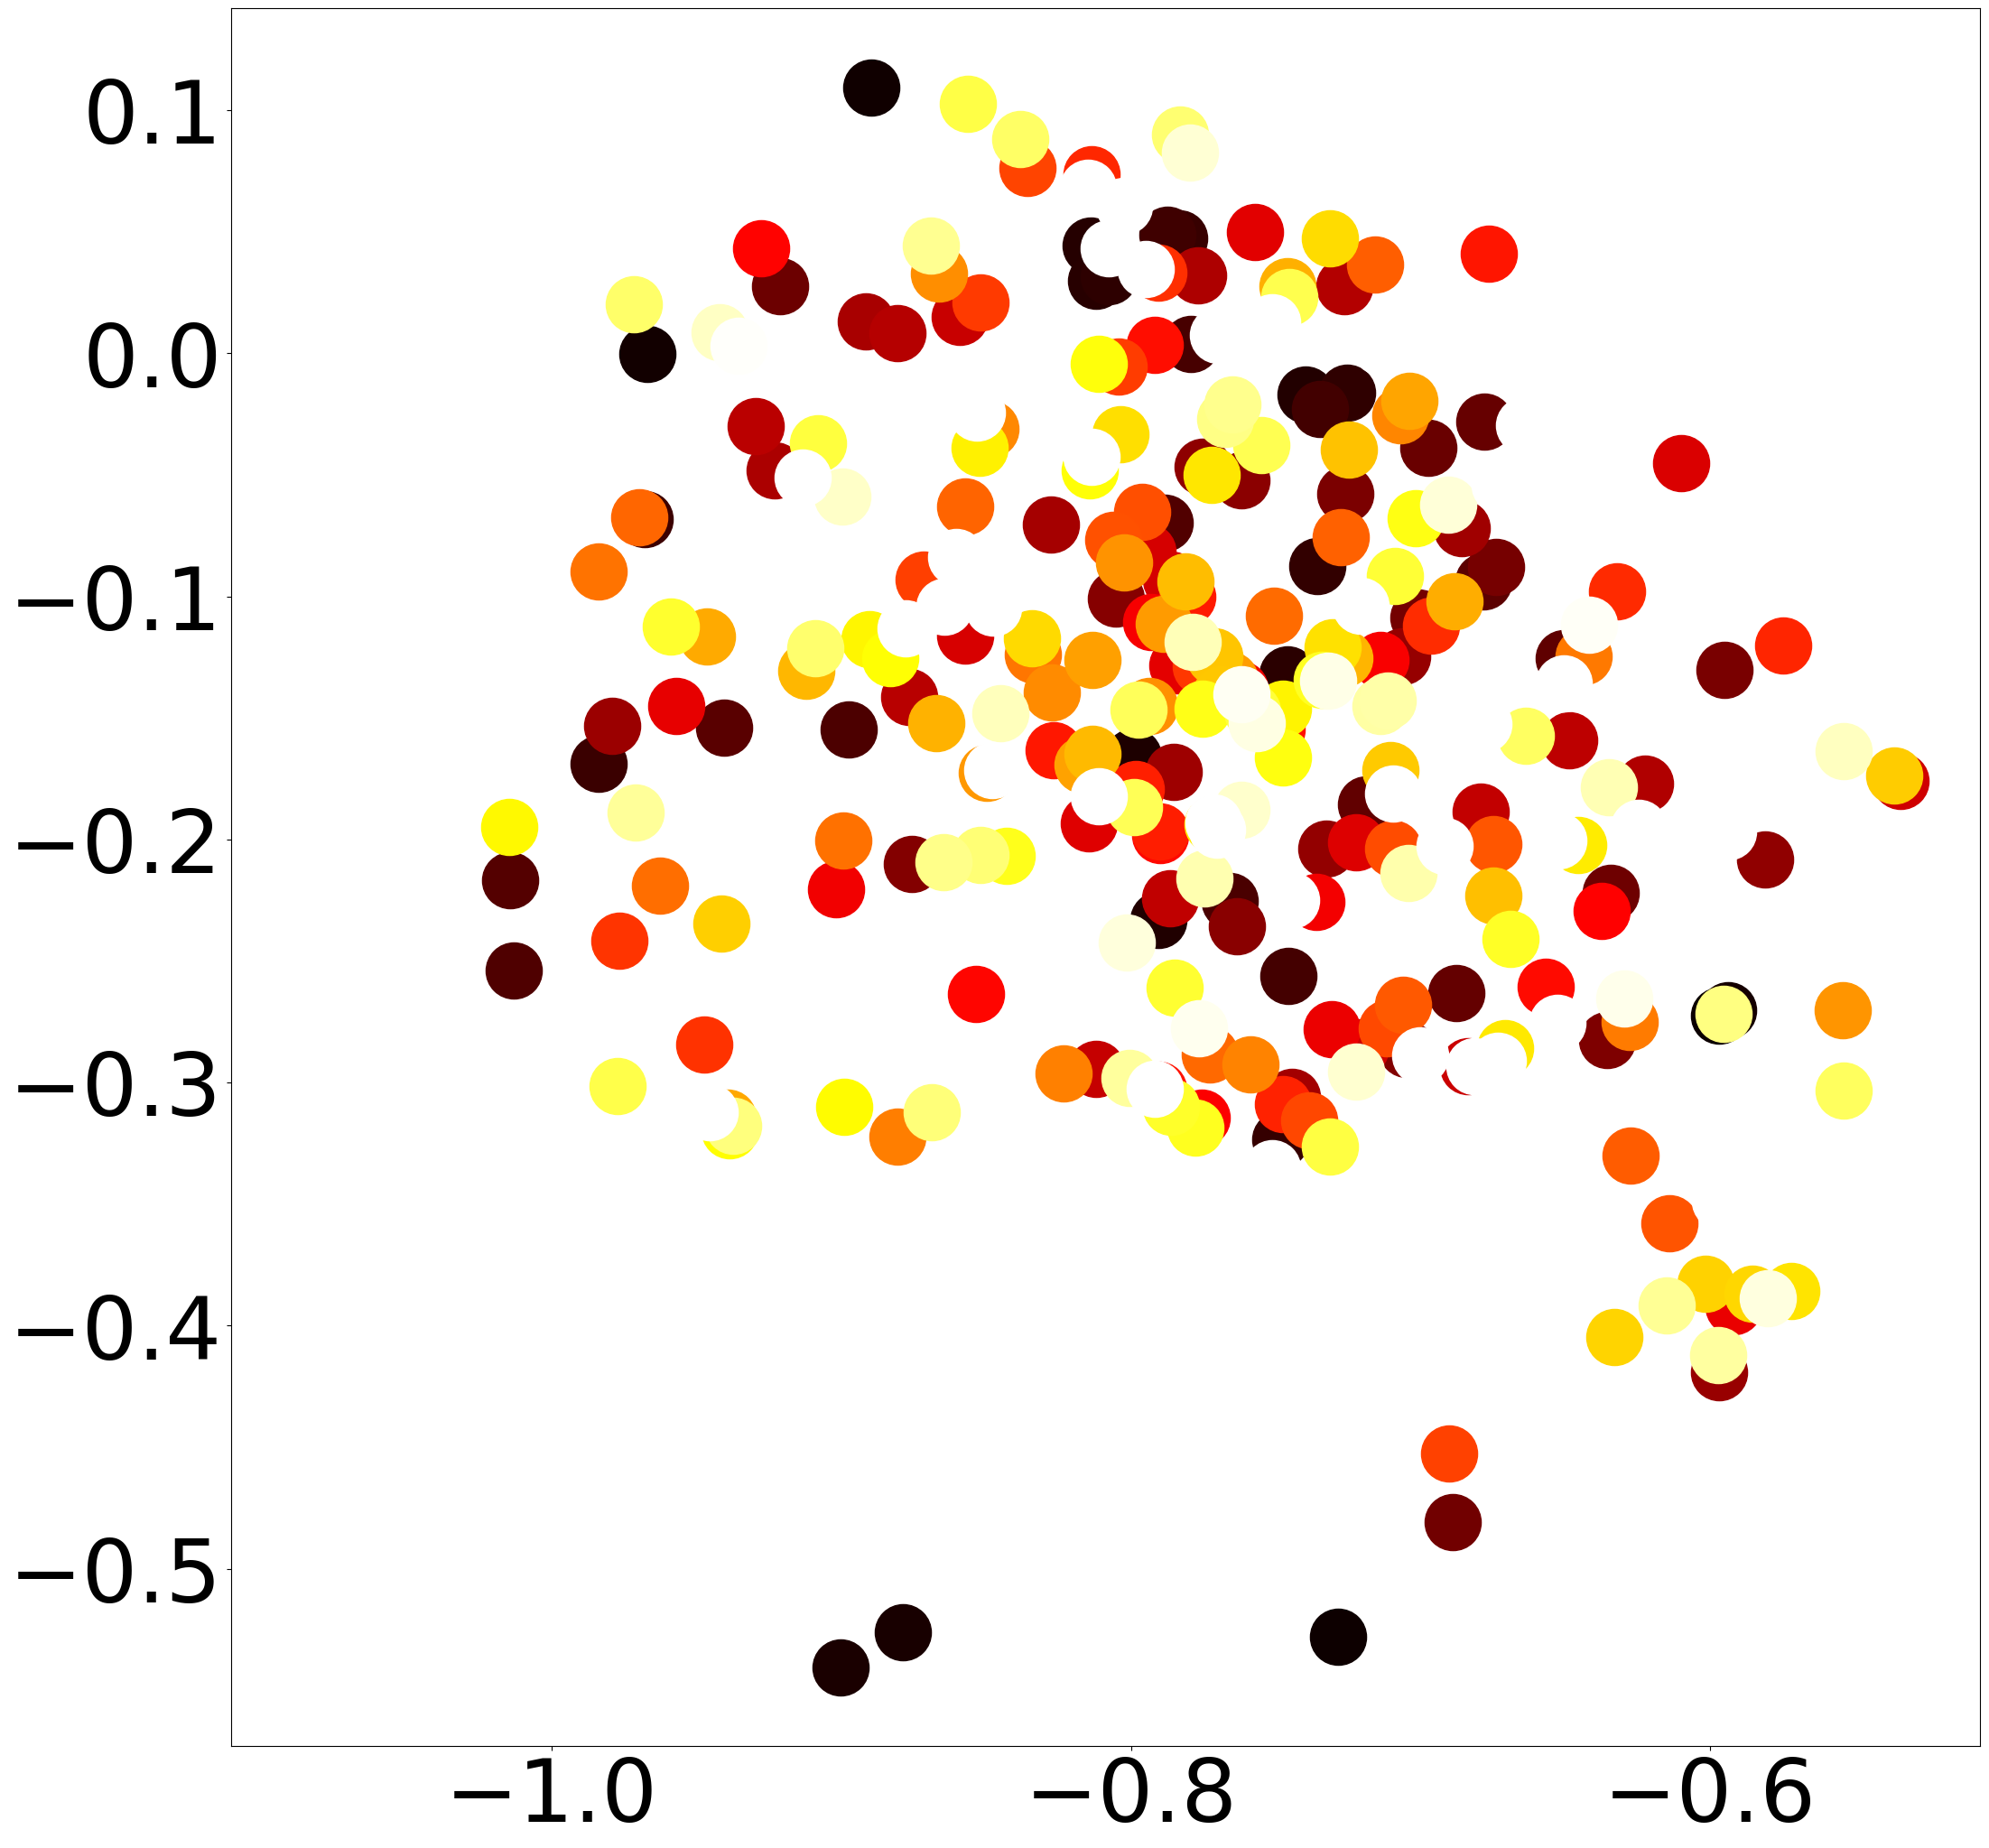

In [23]:
pth = "../results_deep_learning/NPC/results_week_25_mars/example_1_2dim_het_unknown_rot_unknown_trans/ep_1999"
est_het = read_csv(f'{pth}/est_heterogeneities.csv')
scatter_het(est_het, range(300))

In [ ]:
print(fns[58])
print(fns[60])
print(fns[63])

In [ ]:
def plot_view(id, run=0):
    plt.rc('xtick', labelsize=5)
    plt.rc('ytick', labelsize=5)
    plt.subplot(211)
    plt.imshow(all_views[0][id][1, 25, :, :])
    plt.subplot(212)
    plt.imshow(all_est_vols[0][id][0][1, 30, :, :])
    plt.show()
    print('--------------')

In [ ]:
pth_real_data

In [10]:
pth_real_data = f"{PATH_REAL_DATA}/Assembly_cropped_normalized"
views, fns = read_images_in_folder(pth_real_data, alphabetic_order=False, multichannel=True)

In [12]:
from manage_files.read_save_files import read_csv
pth = "/home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_side_views/test_4/ep_1999"
fn_sorted = read_csv(f"{pth}/file_names_sorted.csv", 1, False)

In [17]:
def find_permutation_that_relates_2_arrays(arr1, arr2):
    perm = []
    for i in range(len(arr1)):
        id = np.where(arr2 == arr1[i])
        print('id', id)
        perm.append(id[0][0])
    return np.array(perm)

In [18]:
print('fn', len(fns))
print('gg', len(fn_sorted))
perm = find_permutation_that_relates_2_arrays(fns, fn_sorted)

fn 81
gg 65
id (array([], dtype=int64),)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
perm

In [5]:
pth_het = "/home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_side_views/test_multi_dim_het_2_0/ep_19999/est_heterogeneities.csv"
est_het = read_csv(pth_het)
scatter_het(est_het, perm=perm)

NameError: name 'perm' is not defined

In [ ]:
pth_het_2 = "/home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_side_views/test_multi_dim_het_2_1/ep_19999/est_heterogeneities.csv"
est_het_2 = read_csv(pth_het_2)
scatter_het(est_het_2, perm=perm)

In [ ]:
pth_het_3 = "/home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_side_views/test_multi_dim_het_2_2/ep_19999/est_heterogeneities.csv"
est_het_3 = read_csv(pth_het_3)
scatter_het(est_het_3, perm=perm)

In [ ]:
pth_het_4 = "/home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_side_views/test_multi_dim_het_2_3/ep_19999/est_heterogeneities.csv"
est_het_4 = read_csv(pth_het_4)
scatter_het(est_het_4, perm=perm)

In [ ]:
pth_het_5 = "/home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_side_views/test_multi_dim_het_2_4/ep_19999/est_heterogeneities.csv"
est_het_5 = read_csv(pth_het_5)
scatter_het(est_het_5, perm=perm)

In [ ]:
pth_het_6 = "/home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_side_views/test_multi_dim_het_2_5/ep_19999/est_heterogeneities.csv"
est_het_6 = read_csv(pth_het_6)
scatter_het(est_het_6, perm=perm)

In [ ]:
pth_het_7 = "/home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_side_views/test_multi_dim_het_2_6/ep_19999/est_heterogeneities.csv"
est_het_7 = read_csv(pth_het_7)
scatter_het(est_het_7, perm=perm)

In [ ]:
pth_het_8 = "/home/eloy/Documents/stage_reconstruction_spfluo/real_data/SAS6/results_side_views/test_multi_dim_het_2_7/ep_19999/est_heterogeneities.csv"
est_het_8 = read_csv(pth_het_8)
scatter_het(est_het_8, perm=perm)